# Homework 2 - Programming

There are two main tasks in this programming assignment are to implement the **eight-point algorithm** and **four-point algorithm**. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import utils

## Remarks before starting
Please take note of the following few things:

1. In your `hw2_progrmming` folder, there are two subfolders, namely `four_point` and `eight_point`. In each folder, there are four pairs of scenes (8 images in total) and a `numpy` file, which contains the numpy array of coordinate correspondences. Each image has dimensions (512, 512). For eight-point algorithm, you have 10 points for each pair of scene. For four-point algorithm, you have 6 points for each pair of scene. 
2. coordinate correspondences are given to you as a numpy array, with dimensions (4, 2, 10, 2) for eight-point and (4, 2, 6, 2) for four-point. The dimensions correspond to `(num_scenes, camera angle, num_pts, pixel_coordinates)`. I highly encourage you to print out the array to get a better sense of the x, y, and z axis. 
3. To transform pixel coordinates to Euclidean system, you will need the intrinsic matrix. In our synthetic dataset, the intrinsic matrix `K` is the same for all scenes and camera angles. 
4. Some helpful functions are implemented in `utils.py`. I encourage you to take a look before starting. 

In [2]:
K = np.array([[ 560    ,  0.        ,  0.        ],  # intrinsic matrix
              [ 0.        ,  560    ,  0.        ],
              [ 0.        ,  0.        ,  1.        ]])
K_inv = np.array([[ 1/560    ,  0.        ,  0.        ],  # inverse of intrinsic matrix
              [ 0.        ,  1/560    ,  0.        ],
              [ 0.        ,  0.        ,  1.        ]])

RTP = np.array([[ 0   ,  1     ,  0.        ],  
              [ -1        ,  0 ,  0.        ],
              [ 0.        ,  0.        ,1  ]])
RTN = np.array([[ 0   ,  -1     ,  0.        ],  
              [ 1        ,  0 ,  0.        ],
              [ 0.        ,  0.        ,1  ]])

## Eight Point Algorithm

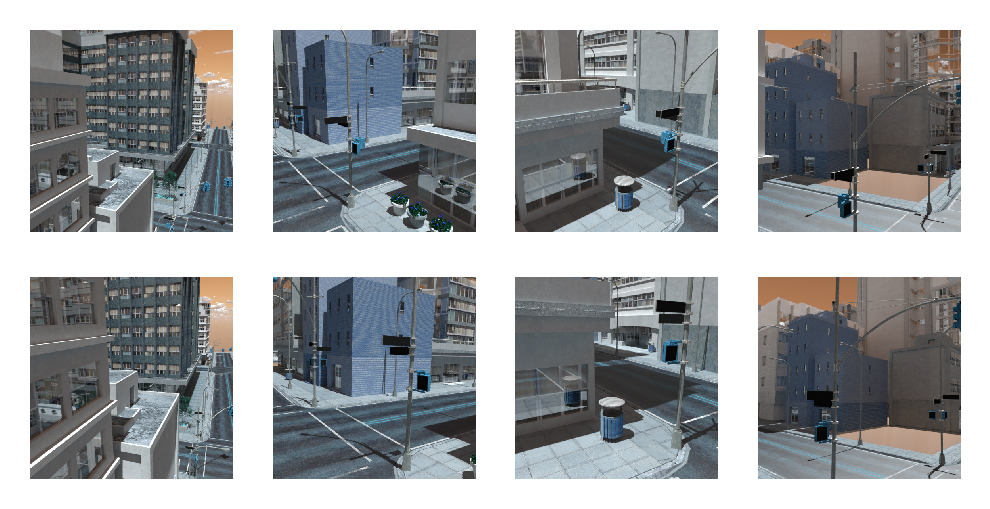

In [3]:
# data loading
folder = "./eight_point/"
img_arr = utils.load_scenes(folder)
utils.plot_scenes(img_arr)

In [7]:
# read correspondences
corr_8 = np.load(os.path.join(folder, 'eight_pt_corr.npy'))
corr_8.shape

(4, 2, 10, 2)

Using the image 2


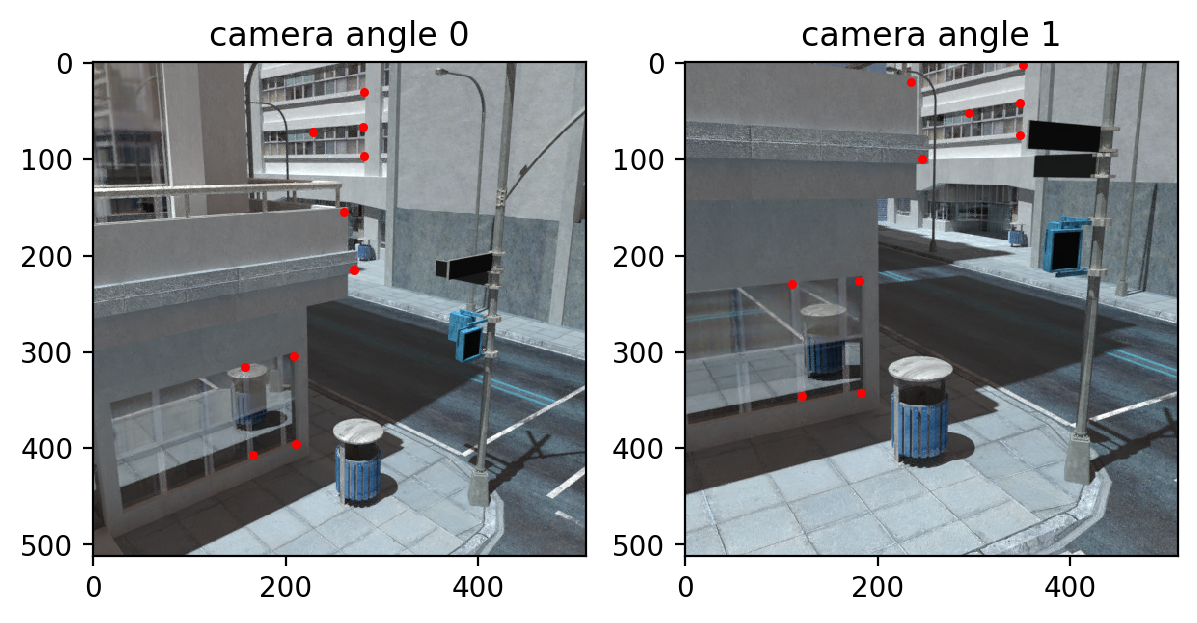

In [8]:
print("Using the image 2")
scene_id =2 # change this to view other scenes
utils.plot_correspondences(img_arr, corr, scene_id)

**TASK1**: Implement the eight-point algorithm below. 

In [9]:
def eight_2(corr,im):
    pass

def hat2vec(T_hat):
    t = np.array([ -  T_hat[1][2],  T_hat[0][2], -T_hat[0][1] ])
    return t

def findRT(U,ss,Vh,Rz):
    T_hat = ((U.dot(Rz)).dot(ss)).dot(U.T)
    T = hat2vec(T_hat)
    R = (U.dot(Rz)).dot(Vh)
    return R,T

def eight_point_algorithm(corr,im):
    # Read the corresponding 8 points
    print("------------------------ 8 Point ----------------------------")
    y1 = corr[im][0, :, 0]
    x1 = corr[im][0, :, 1]
    y2 = corr[im][1, :, 0]
    x2 = corr[im][1, :, 1]
    # Set the para matrix
    a =  np.mat(np.array(
             [[x1[0] * x2[0], x1[0] * y2[0], x1[0], y1[1] * x2[0], y1[0] * y2[0], y1[0], x2[0], y2[0], 1],
              [x1[1] * x2[1], x1[1] * y2[1], x1[1], y1[1] * x2[1], y1[1] * y2[1], y1[1], x2[1], y2[1], 1],
              [x1[2] * x2[2], x1[2] * y2[2], x1[2], y1[2] * x2[2], y1[2] * y2[2], y1[2], x2[2], y2[2], 1],
              [x1[3] * x2[3], x1[3] * y2[3], x1[3], y1[3] * x2[3], y1[3] * y2[3], y1[3], x2[3], y2[3], 1],
              [x1[4] * x2[4], x1[4] * y2[4], x1[4], y1[4] * x2[4], y1[4] * y2[4], y1[4], x2[4], y2[4], 1],
              [x1[5] * x2[5], x1[5] * y2[5], x1[5], y1[5] * x2[5], y1[5] * y2[5], y1[5], x2[5], y2[5], 1],
              [x1[6] * x2[6], x1[6] * y2[6], x1[6], y1[6] * x2[6], y1[6] * y2[6], y1[6], x2[6], y2[6], 1],
              [x1[7] * x2[7], x1[7] * y2[7], x1[7], y1[7] * x2[7], y1[7] * y2[7], y1[7], x2[7], y2[7], 1],
              [x1[8] * x2[8], x1[8] * y2[8], x1[8], y1[8] * x2[8], y1[8] * y2[8], y1[8], x2[8], y2[8], 1]
              ]))
    # Assume e9 = 1 calculate E
    # b = np.mat(np.array([-1, -1, -1, -1, -1, -1, -1, -1])).T
    # leastsq()
    # np.linalg.norm(a.dot(e))
    evalue,evector = np.linalg.eig(a.T.dot(a))
    minVec = evector[:][8]
    b = np.zeros((9,1))
    # f = np.linalg.solve(a, b)
    f =np.array(minVec[ 0,:])
    f = f[0,:]
    F = np.mat([[f[0], f[1], f[2]],
                  [f[3], f[4], f[5]],
                  [f[6], f[7], f[8]]
                  ])
    E = (K.T).dot(F).dot(K)
    E = np.array(E, dtype='float')
    # print("The essential matrix is:\n",E)
    negE = -E

    # The 1,2 solution
    U,S,Vh = np.linalg.svd(E)
    sigma = (S[0]+S[1])/2
    ss = np.diag([1,1,0])
    Rz = RTP
    R1,T1 = findRT(U,ss,Vh,Rz)
    Rz = RTN
    R2, T2 = findRT(U, ss, Vh, Rz)

    # The 3,4 solutions
    U, S, Vh = np.linalg.svd(negE)
    Rz = RTP
    R3, T3 = findRT(U, ss, Vh, Rz)
    Rz = RTN
    R4, T4 = findRT(U, ss, Vh, Rz)

    # Find good R,T
    p_1 = np.array([x1[0],y1[0],1]).T
    p_2 = np.array([x2[0],y2[0],1]).T
    # Km = np.mat(K)
    mindit = 1000
    P_inspace = K_inv.dot(p_1)
    s_2p2 = K.dot(R1.dot(P_inspace) + T1)
    s_2p2 = s_2p2 / s_2p2[0] * p_2[0]
    if((p_2[1] - s_2p2[1]) < mindit):
        R = R1
        T = T1
        mindit = (p_2[1] - s_2p2[1])

    s_2p2 = K.dot(R2.dot(P_inspace) + T2)
    s_2p2 = s_2p2 / s_2p2[0] * p_2[0]
    if ((p_2[1] - s_2p2[1]) < mindit):
        R = R2
        T = T2
        mindit = (p_2[1] - s_2p2[1])

    s_2p2 = K.dot(R3.dot(P_inspace) + T3)
    s_2p2 = s_2p2 / s_2p2[0] * p_2[0]
    if ((p_2[1] - s_2p2[1]) < mindit):
        R = R3
        T = T3
        mindit = (p_2[1] - s_2p2[1])

    s_2p2 = K.dot(R4.dot(P_inspace) + T4)
    s_2p2 = s_2p2 / s_2p2[0] * p_2[0]
    if ((p_2[1] - s_2p2[1]) < mindit):
        R = R4
        T = T4
        mindit = (p_2[1] - s_2p2[1])

    # print("s2p2",s_2p2)
    # print("p2",p_2)
    return R,T

R,T = eight_point_algorithm(corr_8,scene_id)
print("The rotation is:\n", R)
print("The translation is:\n", T)

------------------------ 8 Point ----------------------------
The rotation is:
 [[ 6.94105429e-04  9.96131455e-01 -8.78728811e-02]
 [ 9.99569714e-01 -3.26792122e-03 -2.91497482e-02]
 [-2.93241427e-02 -8.78148376e-02 -9.95705101e-01]]
The translation is:
 [-8.72103096e-02 -4.85287941e-04 -9.96189804e-01]


## Four-point Algorithm

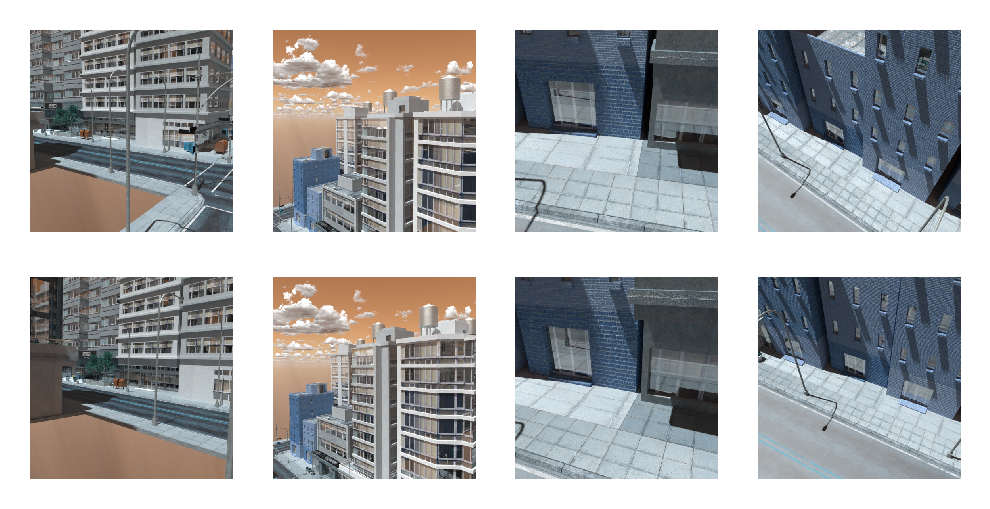

In [10]:
# data loading
folder = "./four_point/"
img_arr = utils.load_scenes(folder)
utils.plot_scenes(img_arr)

In [12]:
# read correspondences
corr_4 = np.load(os.path.join(folder,'four_pt_corr.npy'))

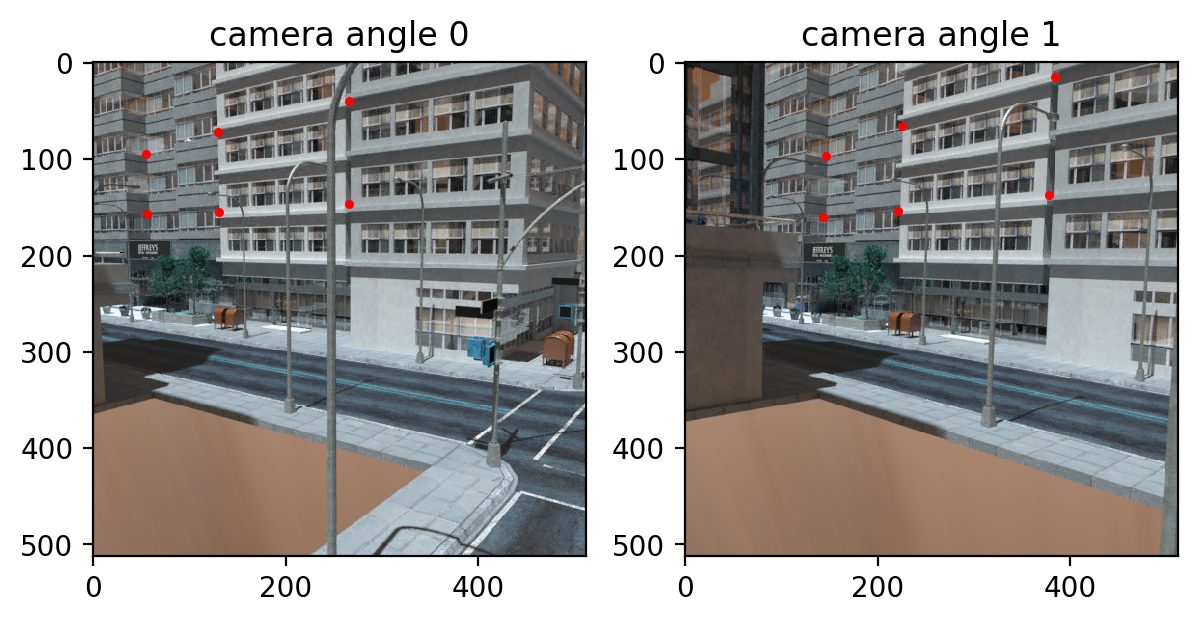

In [13]:
# plotting correspondences
scene_id = 0
utils.plot_correspondences(img_arr, corr, scene_id)

**TASK2**: Implement the four-point algorithm below

In [14]:

def four_point_algorithm(corr, im):
    print("------------------------ 4 Point ----------------------------")
    y0 = corr[im][0, :, 0]
    x0 = corr[im][0, :, 1]
    y1 = corr[im][1, :, 0]
    x1 = corr[im][1, :, 1]

    a = np.mat(np.array(
        [[x0[0], y0[0], 1, 0, 0, 0, -x0[0] * x1[0], -y0[0] * x1[0]],
         [0, 0, 0, x0[0], y0[0], 1, -x0[0] * y1[0], -y0[0] * y1[0]],
         [x0[1], y0[1], 1, 0, 0, 0, -x0[1] * y1[1], -y0[1] * x1[1]],
         [0, 0, 0, x0[1], y0[1], 1, -x0[1] * y1[1], -y0[1] * y1[1]],
         [x0[2], y0[2], 1, 0, 0, 0, -x0[2] * x1[2], -y0[2] * x1[2]],
         [0, 0, 0, x0[2], y0[2], 1, -x0[2] * y1[2], -y0[2] * y1[2]],
         [x0[3], y0[3], 1, 0, 0, 0, -x0[3] * x1[3], -y0[3] * x1[3]],
         [0, 0, 0, x0[3], y0[3], 1, -x0[3] * y1[3], -y0[3] * y1[3]]
         ])
    )
    b = np.mat(np.array([x1[0], y1[0], x1[1], y1[1], x1[2], y1[2], x1[3], y1[3]])).T
    h = np.linalg.solve(a, b)
    H = np.mat(np.array([[h[0], h[1], h[2]],
                [h[3], h[4], h[5]],
                [h[6], h[7], 0]
                ]))

    HTH = (H.T).dot(H)
    HTH = np.array(HTH, dtype='float')
    V, S, VT = np.linalg.svd(HTH)
    v_1 =np.mat(VT[0][:]).T
    v_2 =np.mat(VT[1][:]).T
    v_3 =np.mat(VT[2][:]).T

    u_1 = (np.sqrt(1 - S[2] ** 2) * v_1 + np.sqrt(S[0] ** 2 - 1) * v_3) / np.sqrt(S[0] ** 2 - S[2] ** 2)
    u_2 = (np.sqrt(1 - S[2] ** 2) * v_1 - np.sqrt(S[0] ** 2 - 1) * v_3) / np.sqrt(S[0] ** 2 - S[2] ** 2)

    W1 = np.hstack((H.dot(v_2), H.dot(u_1), np.cross(H.dot(v_2).T, H.dot(u_1).T).T ))
    W2 = np.hstack((H.dot(v_2), H.dot(u_2), np.cross(H.dot(v_2).T, H.dot(u_2).T).T))
    U1 = np.hstack((v_2,u_1,np.cross(v_2.T,u_1.T).T))
    U2 = np.hstack((v_2, u_2, np.cross(v_2.T, u_2.T).T))

    e3 = np.mat(np.array([0, 0, 1])).T
    R1 = W1.dot(U1)
    N1 = np.cross(v_2.T,u_1.T).T
    T1 = (H - R1) .dot(N1)
    cnt=0
    if (N1.T.dot(e3) > 0):
        R = R1
        T = T1
        cnt+=1
    R2 = W2.dot(U2)
    N2 = np.cross(v_2.T, u_2.T).T
    T2 = (H - R2).dot(N2)
    if (N2.T.dot(e3) > 0):
        R = R2
        T = T2
        cnt += 1
    R3 = R1
    N3 = -N1
    T3 = -T1
    if (N3.T.dot(e3) > 0):
        R = R3
        T = T3
        cnt += 1
    R4 = R2
    N4 = -N2
    T4 = -T2
    if (N4.T.dot(e3) > 0):
        R = R4
        T = T4
        cnt += 1
    return R, T

R,T = four_point_algorithm(corr_4,scene_id)
R  = np.array(R)
T = np.array(T)
print("Rotation matrix R :\n", R.astype(float))
print("Translation vector T:\n", T.astype(float))


------------------------ 4 Point ----------------------------
Rotation matrix R :
 [[ 2.72737661 -0.39421382 -0.01435437]
 [-2.05264844  0.29877364 -0.06916017]
 [ 0.00468711  0.01823242  0.00988326]]
Translation vector T:
 [[-2.02370639e+02]
 [-2.68745266e+02]
 [-9.87682726e-03]]


End of Assignment